# Pairs Bootstrapping
## Statistical Computing Notebook W9

Carreon, Ma. Addine Anne T. | *Mapúa University* | *DS122*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_bootstrap_data(data: np.array, size: int) -> np.array:
    x_shape = size
    y_shape = data.size
    
    if size > 1:
        bs_data = np.random.choice(data, size=(x_shape, y_shape))
    else:
        bs_data = np.random.choice(data, size=y_shape)
        
    return bs_data

In [3]:
data = pd.read_csv('dry_beans.csv')

In [4]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,69892,1052.973,389.855771,228.671466,1.704873,0.809910,71139,298.310674,0.684270,0.982471,0.792142,0.765182,0.005578,0.001180,0.585504,0.998209,BARBUNYA
1,34584,704.813,272.448363,161.972223,1.682068,0.804091,34940,209.842123,0.678171,0.989811,0.874857,0.770209,0.007878,0.001710,0.593222,0.997839,DERMASON
2,72102,1072.061,377.616730,243.503876,1.550763,0.764314,73400,302.990293,0.708452,0.982316,0.788348,0.802375,0.005237,0.001339,0.643806,0.998390,BARBUNYA
3,207673,1755.004,659.273337,405.169271,1.627155,0.788863,210788,514.215398,0.733687,0.985222,0.847293,0.779973,0.003175,0.000725,0.608358,0.989893,BOMBAY
4,200116,1773.379,636.108126,402.325059,1.581080,0.774577,202634,504.772825,0.773419,0.987574,0.799629,0.793533,0.003179,0.000777,0.629695,0.995598,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40552,741.016,276.357602,187.451284,1.474290,0.734792,40892,227.227661,0.819299,0.991685,0.928041,0.822223,0.006815,0.001921,0.676051,0.996696,DERMASON
2496,40406,749.200,283.321556,182.209845,1.554919,0.765765,40837,226.818247,0.688934,0.989446,0.904608,0.800568,0.007012,0.001777,0.640910,0.996562,SIRA
2497,81774,1082.182,400.884688,261.508853,1.532968,0.757936,82581,322.673040,0.821156,0.990228,0.877454,0.804902,0.004902,0.001269,0.647868,0.993161,CALI
2498,41619,741.440,261.109381,203.272934,1.284526,0.627648,41975,230.197647,0.796383,0.991519,0.951370,0.881614,0.006274,0.002338,0.777243,0.998389,SEKER


In [5]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,69892,1052.973,389.855771,228.671466,1.704873,0.809910,71139,298.310674,0.684270,0.982471,0.792142,0.765182,0.005578,0.001180,0.585504,0.998209,BARBUNYA
1,34584,704.813,272.448363,161.972223,1.682068,0.804091,34940,209.842123,0.678171,0.989811,0.874857,0.770209,0.007878,0.001710,0.593222,0.997839,DERMASON
2,72102,1072.061,377.616730,243.503876,1.550763,0.764314,73400,302.990293,0.708452,0.982316,0.788348,0.802375,0.005237,0.001339,0.643806,0.998390,BARBUNYA
3,207673,1755.004,659.273337,405.169271,1.627155,0.788863,210788,514.215398,0.733687,0.985222,0.847293,0.779973,0.003175,0.000725,0.608358,0.989893,BOMBAY
4,200116,1773.379,636.108126,402.325059,1.581080,0.774577,202634,504.772825,0.773419,0.987574,0.799629,0.793533,0.003179,0.000777,0.629695,0.995598,BOMBAY


In [6]:
data.shape

(2500, 17)

In [7]:
sample_data = data[data['Class'] == 'BOMBAY']
sample_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3,207673,1755.004,659.273337,405.169271,1.627155,0.788863,210788,514.215398,0.733687,0.985222,0.847293,0.779973,0.003175,0.000725,0.608358,0.989893,BOMBAY
4,200116,1773.379,636.108126,402.325059,1.581080,0.774577,202634,504.772825,0.773419,0.987574,0.799629,0.793533,0.003179,0.000777,0.629695,0.995598,BOMBAY
9,231066,1787.859,641.904275,460.198497,1.394842,0.697148,232903,542.404248,0.736700,0.992113,0.908405,0.844992,0.002778,0.000874,0.714012,0.995934,BOMBAY
31,193584,1693.359,637.042723,390.593855,1.630959,0.789977,197382,496.466317,0.800596,0.980758,0.848362,0.779330,0.003291,0.000749,0.607355,0.990571,BOMBAY
35,169969,1592.346,601.350019,363.544940,1.654128,0.796569,172267,465.200228,0.745632,0.986660,0.842374,0.773593,0.003538,0.000782,0.598446,0.989907,BOMBAY


In [8]:
BOOTSTRAP_NUM_SAMPLES = 500

bootstrap_indices = get_bootstrap_data(sample_data.index, size=BOOTSTRAP_NUM_SAMPLES)
bootstrap_indices

array([[1442, 1049,  660, ...,   35, 1205,  257],
       [ 627,  769,  422, ..., 1921, 2020,  917],
       [1906,  325, 1969, ...,  424,  761, 1818],
       ...,
       [ 223, 2186, 2109, ...,    3, 1906, 1671],
       [ 167,  298,   79, ..., 1029, 2409,  434],
       [1980,  422, 2359, ..., 1610, 1160,  684]], dtype=int64)

In [9]:
bootstrap_indices.shape

(500, 103)

<h1><b><center> MinorAxisLength and EquivDiameter </center></b></h1>

In [10]:
MinorAxisLength_map = np.vectorize(lambda x: sample_data['MinorAxisLength'][x])
EquivDiameter_map = np.vectorize(lambda x: sample_data['EquivDiameter'][x])

In [11]:
MinorAxisLength_bs_data = MinorAxisLength_map(bootstrap_indices)
EquivDiameter_bs_data = EquivDiameter_map(bootstrap_indices)

In [12]:
MinorAxisLength_bs_data

array([[376.78577545, 411.06565204, 394.21196776, ..., 363.54493975,
        382.8316956 , 342.81493492],
       [413.00764013, 447.41832875, 395.8854849 , ..., 361.9939189 ,
        373.00100839, 357.82781814],
       [354.96857075, 389.11608985, 353.81561866, ..., 357.26287614,
        393.76639395, 370.15130256],
       ...,
       [350.57336457, 388.98486301, 343.01847447, ..., 405.16927117,
        354.96857075, 367.62211304],
       [342.46875483, 401.75994135, 387.73624556, ..., 385.17756679,
        386.4526105 , 364.00763944],
       [387.01233884, 395.8854849 , 361.73940282, ..., 352.59592025,
        368.74483814, 351.89957459]])

In [13]:
EquivDiameter_bs_data

array([[464.29752026, 504.20875306, 464.00263018, ..., 465.20022805,
        458.32339383, 447.3678325 ],
       [507.59883175, 569.37435833, 497.42199462, ..., 466.76724171,
        494.11670903, 463.52080184],
       [421.48096161, 509.25790754, 474.4804209 , ..., 449.14310302,
        488.94246099, 458.32617186],
       ...,
       [462.72489455, 469.47625191, 453.42453507, ..., 514.21539842,
        421.48096161, 459.53579261],
       [430.17596654, 513.01185208, 466.64720385, ..., 494.4541545 ,
        511.48819018, 460.7836876 ],
       [482.03586742, 497.42199462, 445.55548487, ..., 454.59818577,
        460.92873301, 479.45758945]])

In [14]:
bs_slopes = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(MinorAxisLength_bs_data[i], EquivDiameter_bs_data[i], deg=1)
    bs_slopes[i] = slope
    bs_intercepts[i] = intercept

In [15]:
original_slope, original_intercept = np.polyfit(sample_data['MinorAxisLength'], sample_data['EquivDiameter'], deg=1)

Text(0.5, 1.0, 'Regression Fitting with Bootstrap Estimation')

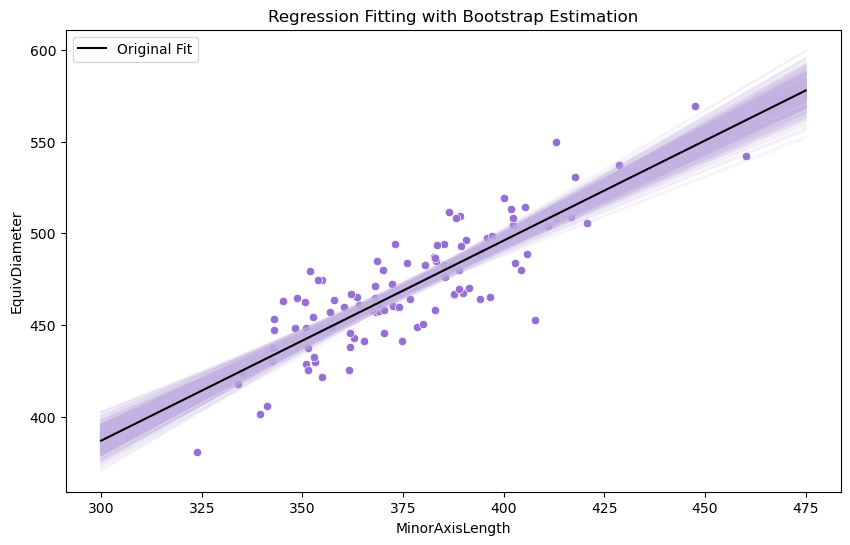

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

x_data = np.arange(300, 500, 25)

for slope, intercept in zip(bs_slopes, bs_intercepts):
    sns.lineplot(x=x_data, y=slope*x_data+intercept, alpha=0.1, errorbar=None, color='#C3B1E1', ax=ax)
    
sns.lineplot(x=x_data, y=original_slope*x_data+original_intercept, errorbar=None, color='black', label='Original Fit', ax=ax)
sns.scatterplot(data=sample_data, x='MinorAxisLength', y='EquivDiameter', color='#966FD6', ax=ax)

ax.legend()

ax.set_xlabel('MinorAxisLength')
ax.set_ylabel('EquivDiameter')
ax.set_title('Regression Fitting with Bootstrap Estimation')

<h1><b><center>Eccentricity and Solidity</center></b></h1>

In [17]:
Eccentricity_map = np.vectorize(lambda x: sample_data['Eccentricity'][x])
Solidity_map = np.vectorize(lambda x: sample_data['Solidity'][x])

In [18]:
Eccentricity_bs_data = Eccentricity_map(bootstrap_indices)
Solidity_bs_data = Solidity_map(bootstrap_indices)

In [19]:
Eccentricity_bs_data

array([[0.75723356, 0.75397495, 0.69418765, ..., 0.79656873, 0.72392087,
        0.81204767],
       [0.75362561, 0.79580565, 0.77632267, ..., 0.8075236 , 0.82498153,
        0.80443501],
       [0.70671217, 0.81775583, 0.83535899, ..., 0.7784474 , 0.768209  ,
        0.76310025],
       ...,
       [0.82152204, 0.7338998 , 0.82392028, ..., 0.7888627 , 0.70671217,
        0.77176255],
       [0.77627252, 0.79585879, 0.72634937, ..., 0.796846  , 0.82229048,
        0.78570439],
       [0.77656795, 0.77632267, 0.75726059, ..., 0.80587131, 0.77217656,
        0.84528499]])

In [20]:
Solidity_bs_data

array([[0.98557524, 0.98381407, 0.98712785, ..., 0.98666024, 0.98458499,
        0.99062864],
       [0.99156234, 0.96716187, 0.99119639, ..., 0.97900289, 0.99090002,
        0.99114254],
       [0.99028334, 0.98386692, 0.98800876, ..., 0.9901818 , 0.9768941 ,
        0.98595026],
       ...,
       [0.98703441, 0.98786201, 0.9847656 , ..., 0.98522212, 0.99028334,
        0.9894112 ],
       [0.98698185, 0.98711085, 0.99084631, ..., 0.99255139, 0.99079968,
        0.9825592 ],
       [0.96469369, 0.99119639, 0.98496497, ..., 0.97791247, 0.99001454,
        0.98970536]])

In [21]:
bs_slopes = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(Eccentricity_bs_data[i], Solidity_bs_data[i], deg=1)
    bs_slopes[i] = slope
    bs_intercepts[i] = intercept

In [22]:
original_slope, original_intercept = np.polyfit(sample_data['Eccentricity'], sample_data['Solidity'], deg=1)

Text(0.5, 1.0, 'Regression Fitting with Bootstrap Estimation')

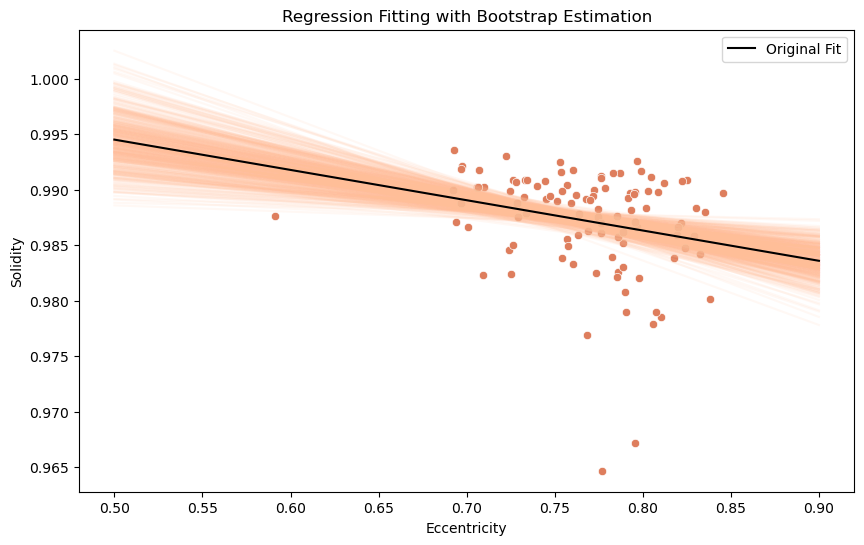

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

x_data = np.arange(0.5, 1, 0.1)

for slope, intercept in zip(bs_slopes, bs_intercepts):
    sns.lineplot(x=x_data, y=slope*x_data+intercept, alpha=0.1, errorbar=None, color='#FFBE98', ax=ax)
    
sns.lineplot(x=x_data, y=original_slope*x_data+original_intercept, errorbar=None, color='black', label='Original Fit', ax=ax)
sns.scatterplot(data=sample_data, x='Eccentricity', y='Solidity', color='#DE7E5D', ax=ax)

ax.legend()

ax.set_xlabel('Eccentricity')
ax.set_ylabel('Solidity')
ax.set_title('Regression Fitting with Bootstrap Estimation')

---

<h3><center>END OF FILE</center></h3>

---